# Task1   Data Acquisition

Data acquisition is a process of loading and reading data from various sources. We will learn how to export and read data from a local file in different format using  **Pandas** package. 

A file format is a standardised way in which information is encoded to be stored in a file. Some examples of file formats are: CSV, XLSX, and PKL. 

### pickle — Python object serialization

This data format is Python-specific. This has the advantage that there are no restrictions imposed by external standards; however it means that non-Python programs may not be able to reconstruct pickled Python objects.


In [255]:
import os
import csv
import urllib
import json

import pandas as pd
import numpy as np
import datetime
from alpha_vantage.timeseries import TimeSeries
from covid19dh import covid19
import requests
import matplotlib.pyplot as plt
import dataframe_image as dfi
import pickle
import seaborn as sn
from scipy import stats
from matplotlib.ticker import MultipleLocator

import time


### How to make a request in python?
There are many different way to request data. 
In the following, we will use the package **urllib** that collects several modules for working with URLs.

In particular, [urlib.request](https://docs.python.org/3/library/urllib.request.html#module-urllib.request) is a module for opening and reading URLs.

In [38]:
api_key='B1Q551T88OEDZJ52'

In [78]:
api_key='B1Q551T88OEDZJ52'
def acquire_stock_data():
    ts = TimeSeries (key=api_key, output_format = "pandas")
    data_daily, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize ='full')

    start_date = datetime.datetime(2017, 4, 1)
    end_date = datetime.datetime(2022, 4, 30)

    # Create a filtered dataframe, and change the order it is displayed. 
    stock_data = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
    stock_data = stock_data.sort_index(ascending=True)
    #date_filter

    stock_data = stock_data.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
                                '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
                                '8. split coefficient': 'Split'})
    return stock_data
#type(date_filter)

In [8]:
ts = TimeSeries (key=api_key, output_format = "pandas")
data_daily, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize ='full')

start_date = datetime.datetime(2017, 4, 1)
end_date = datetime.datetime(2022, 4, 30)

# Create a filtered dataframe, and change the order it is displayed. 
stock_data = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
stock_data = stock_data.sort_index(ascending=True)
#date_filter
stock_data = stock_data.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
                                '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
                                '8. split coefficient': 'Split'})
stock_data


            1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2017-04-03   143.71  144.120  143.05    143.70          33.718447   
2017-04-04   143.25  144.890  143.17    144.77          33.969517   
2017-04-05   144.22  145.460  143.81    144.02          33.793534   
2017-04-06   144.29  144.520  143.45    143.66          33.709062   
2017-04-07   143.73  144.180  143.27    143.34          33.633975   
...             ...      ...     ...       ...                ...   
2022-04-25   161.12  163.170  158.46    162.88         161.942007   
2022-04-26   162.25  162.340  156.72    156.80         155.897020   
2022-04-27   155.91  159.790  155.38    156.57         155.668345   
2022-04-28   159.25  164.515  158.93    163.64         162.697630   
2022-04-29   161.84  166.200  157.25    157.65         156.742125   

              6. volume  7. dividend amount  8. split coefficient  
date                              

,Open,High,Low,Original Close,Close,Volume,Dividend,Split
date,,,,,,,,
2017-04-03,143.71,144.120,143.05,143.70,33.718447,19985714.0,0.0,1.0
2017-04-04,143.25,144.890,143.17,144.77,33.969517,19891354.0,0.0,1.0
2017-04-05,144.22,145.460,143.81,144.02,33.793534,27717854.0,0.0,1.0
2017-04-06,144.29,144.520,143.45,143.66,33.709062,21149034.0,0.0,1.0
2017-04-07,143.73,144.180,143.27,143.34,33.633975,16658543.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-25,161.12,163.170,158.46,162.88,161.942007,96046376.0,0.0,1.0
2022-04-26,162.25,162.340,156.72,156.80,155.897020,94008394.0,0.0,1.0
2022-04-27,155.91,159.790,155.38,156.57,155.668345,88063191.0,0.0,1.0


In [65]:
ts = TimeSeries (key=api_key, output_format = "pandas")
data_daily, meta_data = ts.get_daily_adjusted(symbol='SSNLF', outputsize ='full')

start_date = datetime.datetime(2017, 4, 1)
end_date = datetime.datetime(2022, 4, 30)

# Create a filtered dataframe, and change the order it is displayed. 
stock_data_SSNLF = data_daily[(data_daily.index > start_date) & (data_daily.index <= end_date)]
stock_data_SSNLF = stock_data_SSNLF.sort_index(ascending=True)
#date_filter
stock_data_SSNLF = stock_data_SSNLF.rename(columns={'1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Original Close',
                                '5. adjusted close': 'Close', '6. volume': 'Volume', '7. dividend amount': 'Dividend',
                                '8. split coefficient': 'Split'})
stock_data_SSNLF


,Open,High,Low,Original Close,Close,Volume,Dividend,Split
date,,,,,,,,
2017-04-03,1500.00,1500.00,1500.00,1500.00,29.587798,7.0,0.0,1.0
2017-04-04,1500.00,1500.00,1500.00,1500.00,29.587798,20.0,0.0,1.0
2017-04-05,1500.00,1500.00,1500.00,1500.00,29.587798,0.0,0.0,1.0
2017-04-06,1500.00,1500.00,1500.00,1500.00,29.587798,0.0,0.0,1.0
2017-04-07,1500.00,1500.00,1500.00,1500.00,29.587798,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-04-25,57.75,57.75,57.75,57.75,57.750000,0.0,0.0,1.0
2022-04-26,57.75,57.75,57.75,57.75,57.750000,0.0,0.0,1.0
2022-04-27,57.75,57.75,57.75,57.75,57.750000,0.0,0.0,1.0


In [4]:
def make_dir(direction):
    if not os.path.exists(direction):
        os.makedirs(direction)    

In [5]:
import pickle
datasets_dir='./Datasets'
stock_filename='AAPL_stock_data'
stock_path = os.path.join(datasets_dir, f'{stock_filename}.pkl')
pd.to_pickle(stock_data,stock_path)
stock_data.to_csv(os.path.join(datasets_dir,f'{stock_filename}.csv'))

In [66]:
stock_filename_SSNLF='SSNLF_stock_data'

stock_data_SSNLF.to_pickle(os.path.join(datasets_dir, f'{stock_filename_SSNLF}.pkl'))
stock_data_SSNLF.to_csv(os.path.join(datasets_dir, f'{stock_filename_SSNLF}.csv'))

In [126]:
'''Covid Data'''
base_dir='./Datasets'
df_covid,src=covid19('USA',start=start_date,end=end_date)
filename='Covid'
dataframe_path = os.path.join(base_dir, f'{filename}.pkl')
# Save the dataset in a pickle file
pd.to_pickle(df_covid, dataframe_path)
df_covid.to_csv(os.path.join(base_dir, f'{filename}.csv'))

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:69: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for iso,country in x.groupby(["iso_alpha_3"]):
/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
/Users/xumujie/miniforge3/envs/python39/lib/python3.9/site-packages/covid19dh/_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)


In [ ]:
company='AAPL'


In [63]:
f = requests.get("https://financialmodelingprep.com/api/v3/income-statement/AAPL?period=quarter&limit=20&apikey=51ecb7213619cbf5416b2c5acc8a12cf")
fs = f.json()
fs
# df = pd.DataFrame.from_dict(js[header], orient='index', dtype=np.float)
# income_statement = pd.DataFrame.from_dict(js)
# income_statement.to_csv("Apple_Income_Statement_2017_2021.csv", index = False) # Store the data locally as a .csv file.



{'Error Message': 'Special Endpoint : This endpoint is not available under your current subscription please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/developer/docs/pricing'}

In [61]:
#cash flow
def retrieve_data(function:str, symbol:str,api_key:str)->dict:
    url=f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}"
    response=requests.get(url)
    data=response.json()
    #parsed=json.loads(data)
    return data

data_earnings=retrieve_data('EARNINGS','AAPL',api_key)
data_earnings
#new=pd.DataFrame.from_dict(data_cashflow,orient='index', dtype=np.float)
#new
# def pretty_print(data:dict):
#     print(json.dumps(data,indent=4))

# from alpha_vantage.fundamentaldata import FundamentalData
# fd= FundamentalData(key=api_key,output_format='pandas')
# data_cashflow=fd.get_earning_quarterly('AAPL')
# data_cashflow[0]

{'symbol': 'AAPL',
 'annualEarnings': [{'fiscalDateEnding': '2022-12-31', 'reportedEPS': '0'},
  {'fiscalDateEnding': '2022-09-30', 'reportedEPS': '6.11'},
  {'fiscalDateEnding': '2021-09-30', 'reportedEPS': '5.62'},
  {'fiscalDateEnding': '2020-09-30', 'reportedEPS': '3.27'},
  {'fiscalDateEnding': '2019-09-30', 'reportedEPS': '2.98'},
  {'fiscalDateEnding': '2018-09-30', 'reportedEPS': '2.97'},
  {'fiscalDateEnding': '2017-09-30', 'reportedEPS': '2.3'},
  {'fiscalDateEnding': '2016-09-30', 'reportedEPS': '2.0675'},
  {'fiscalDateEnding': '2015-09-30', 'reportedEPS': '2.3'},
  {'fiscalDateEnding': '2014-09-30', 'reportedEPS': '1.6075'},
  {'fiscalDateEnding': '2013-09-30', 'reportedEPS': '1.415'},
  {'fiscalDateEnding': '2012-09-30', 'reportedEPS': '1.5775'},
  {'fiscalDateEnding': '2011-09-30', 'reportedEPS': '0.9875'},
  {'fiscalDateEnding': '2010-09-30', 'reportedEPS': '0.54'},
  {'fiscalDateEnding': '2009-09-30', 'reportedEPS': '0.2225'},
  {'fiscalDateEnding': '2008-09-30', 'repo

In [86]:
from meteostat import Point
from meteostat import Daily
location = Point(37.323,-122.032,70)
#coordinates = {'ATL':[33.63, -84.42], 'DFW':[32.89, -97.04], 'DEN':[39.85, -104.67], 'ORD':[41.97, -87.90], 'LAX':[33.94, -118.42]}
data = Daily(location, start_date, end_date)
cupertino_weather = data.fetch()
cupertino_weather.to_csv("Cupertino_Weather_2017_2022.csv")
cupertino_weather.to_pickle("Cupertino_Weather_2017_2022.pkl")


# Data Preprocessing

- 1. Data cleaning

Missing data: GDP and revenue are not stored by day, so I copy the data for everyday in a month/quarter. All data are stored in 'multidata.csv'.

Outliers: I plot the box diagrams of three datasets (will be shown in task 4), which show that there're no outliers.

- 2. Data visualization

I plot three datasets directly. General trend can be shown in the pictures.

- 3. Data transformation

I did data normalization in this part. As magnitudes of all datasets are different.

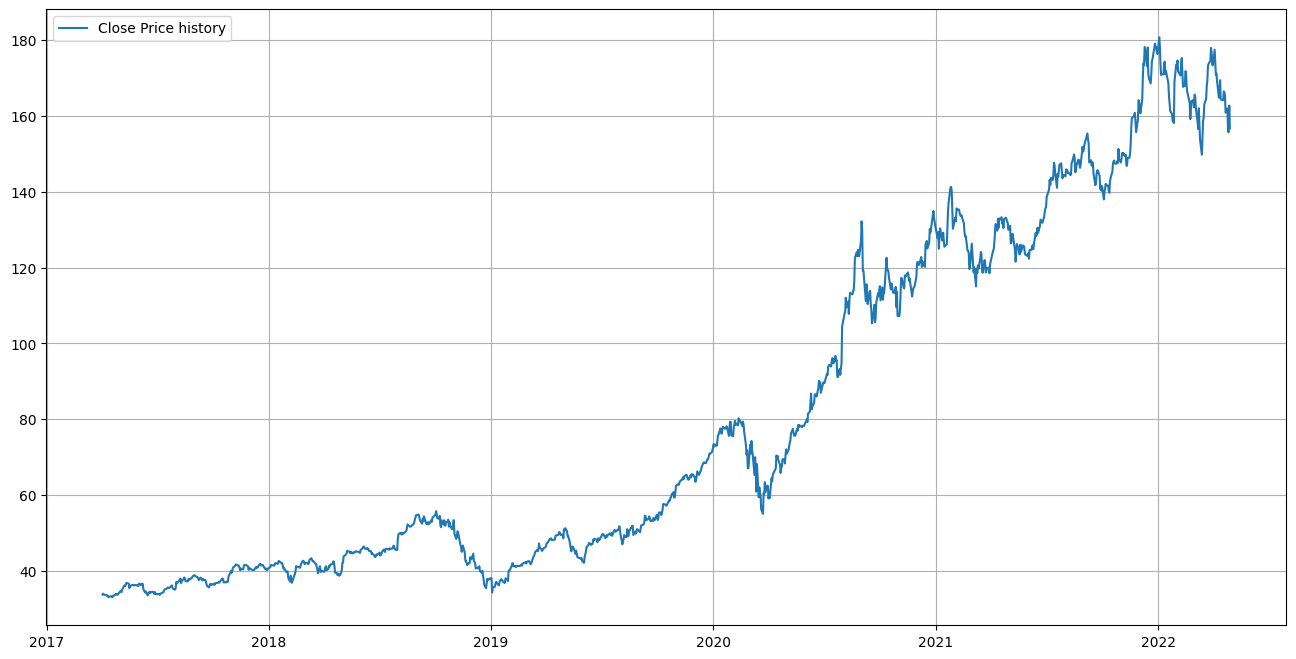

In [89]:
price=stock_data['Close']
plt.figure(figsize=(16,8))
plt.plot(price, label='Close Price history')
plt.legend()
plt.grid()
plt.savefig('price.jpg')

In [ ]:
price=stock_data['Close']
day=price.resample('D').asfreq()
day[:10]


In [70]:
preprocessed_path='./Preprocessed'

In [71]:
# res=open('./Datasets/AAPL_stock_data.pkl','rb')
# stock_time_series=pickle.load(res)
stock_pre_filename='AAPL_stock_data_pre'
stock_time_series=stock_data['Close']
# stock_time_series.to_csv(os.path.join(preprocessed_path,f'{stock_pre_filename}.csv'))
# stock_time_series.to_pickle(os.path.join(preprocessed_path,f'{stock_pre_filename}.pkl'))


In [72]:
pdates = pd.date_range(start=start_date, end=end_date)
stock_time_series=stock_time_series.reindex(pdates, fill_value=np.nan)
stock_time_series.to_csv(os.path.join(preprocessed_path,f'{stock_pre_filename}.csv'))
stock_time_series.to_pickle(os.path.join(preprocessed_path,f'{stock_pre_filename}.pkl'))
stock_time_series

2017-04-01           NaN
2017-04-02           NaN
2017-04-03     33.718447
2017-04-04     33.969517
2017-04-05     33.793534
                 ...    
2022-04-26    155.897020
2022-04-27    155.668345
2022-04-28    162.697630
2022-04-29    156.742125
2022-04-30           NaN
Freq: D, Name: Close, Length: 1856, dtype: float64

In [125]:
covid_path=open('./Datasets/Covid.pkl','rb')
covid_time_series=pickle.load(covid_path)
covid_time_series=covid_time_series[['date', 'confirmed']]
# covid_time_series
covid_time_series.set_index('date',inplace=True)
covid_time_series
#补全时间

,confirmed
date,
2020-01-21,1.0
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,2.0
2020-01-25,3.0
...,...
2022-04-26,80996837.0
2022-04-27,81081307.0
2022-04-28,81154876.0


In [88]:
pdates = pd.date_range(start=start_date, end=end_date)
covid_time_series = covid_time_series.reindex(pdates, fill_value=np.nan)
covid_time_series

,confirmed
2017-04-01,NaN
2017-04-02,NaN
2017-04-03,NaN
2017-04-04,NaN
2017-04-05,NaN
...,...
2022-04-26,80996837.0
2022-04-27,81081307.0
2022-04-28,81154876.0
2022-04-29,81236707.0


In [89]:
covid_pre_filename='covid_time_preprocessed'
covid_time_series.to_csv(os.path.join(preprocessed_path,f'{covid_pre_filename}.csv'))
covid_time_series.to_pickle(os.path.join(preprocessed_path,f'{covid_pre_filename}.pkl'))

In [288]:
weather_path=open('Cupertino_Weather_2017_2022.pkl','rb')
weather_time_series=pickle.load(weather_path)
# weather_time_series.set_index('date',inplace=True)
# weather_time_series.set_index('time',inplace=True)
# weather_time_series
#weather_time_series=weather_time_series[['date', 'confirmed', 'recovered', 'deaths']]
print(weather_time_series)

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2017-04-01  17.4   9.7  25.3   0.0   0.0    NaN   7.5   NaN  1015.7   NaN
2017-04-02  16.8  10.3  24.7   0.0   0.0    NaN  10.2   NaN  1015.3   NaN
2017-04-03  15.4   9.7  21.9   0.0   0.0    NaN  11.8   NaN  1014.9   NaN
2017-04-04  15.2   7.5  23.0   0.0   0.0    NaN   8.7   NaN  1016.5   NaN
2017-04-05  17.4  11.9  24.1   0.0   0.0    NaN   8.4   NaN  1016.3   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2022-04-26  14.4  10.8  19.1   0.0   NaN  357.0  13.1   NaN  1016.6   NaN
2022-04-27  12.8   6.9  19.1   0.0   NaN  329.0  13.8   NaN  1016.6   NaN
2022-04-28  12.8   8.6  17.5   0.0   NaN  320.0  17.4   NaN  1019.0   NaN
2022-04-29  14.3   6.9  23.0   0.0   NaN  347.0  11.1   NaN  1019.7   NaN
2022-04-30  14.8   9.7  21.9   0.0   NaN  348.0  12.3   NaN  1017.2   NaN

[1856 rows x 10 columns]


In [289]:
#weather_time_series = weather_time_series.reindex(pdates, fill_value=np.nan)
#weather_time_series=weather_time_series.drop(['wpgt'], axis = 1)
weather_time_series=weather_time_series.drop(['wpgt','snow','tsun'],axis=1)
weather_time_series

,tavg,tmin,tmax,prcp,wdir,wspd,pres
time,,,,,,,
2017-04-01,17.4,9.7,25.3,0.0,NaN,7.5,1015.7
2017-04-02,16.8,10.3,24.7,0.0,NaN,10.2,1015.3
2017-04-03,15.4,9.7,21.9,0.0,NaN,11.8,1014.9
2017-04-04,15.2,7.5,23.0,0.0,NaN,8.7,1016.5
2017-04-05,17.4,11.9,24.1,0.0,NaN,8.4,1016.3
...,...,...,...,...,...,...,...
2022-04-26,14.4,10.8,19.1,0.0,357.0,13.1,1016.6
2022-04-27,12.8,6.9,19.1,0.0,329.0,13.8,1016.6
2022-04-28,12.8,8.6,17.5,0.0,320.0,17.4,1019.0


In [91]:
# if "snow" not in weather_time_series.columns:
#     weather_time_series.fillna(weather_time_series.mean(), inplace = True)

# # Now the Weather.
# if "snow" in weather_time_series.columns:
#     weather_time_series.drop("tsun", axis = 1, inplace = True)# Drop as it has all null values.
#     normal_cols = ["tavg", "tmin", "tmax", "prcp", "wdir", "wspd", "pres"]   
#     for col in normal_cols:
#         weather_time_series[col].fillna(weather_time_series[col].mean(), inplace = True)



In [290]:
print(weather_time_series)
type(weather_time_series)


            tavg  tmin  tmax  prcp   wdir  wspd    pres
time                                                   
2017-04-01  17.4   9.7  25.3   0.0    NaN   7.5  1015.7
2017-04-02  16.8  10.3  24.7   0.0    NaN  10.2  1015.3
2017-04-03  15.4   9.7  21.9   0.0    NaN  11.8  1014.9
2017-04-04  15.2   7.5  23.0   0.0    NaN   8.7  1016.5
2017-04-05  17.4  11.9  24.1   0.0    NaN   8.4  1016.3
...          ...   ...   ...   ...    ...   ...     ...
2022-04-26  14.4  10.8  19.1   0.0  357.0  13.1  1016.6
2022-04-27  12.8   6.9  19.1   0.0  329.0  13.8  1016.6
2022-04-28  12.8   8.6  17.5   0.0  320.0  17.4  1019.0
2022-04-29  14.3   6.9  23.0   0.0  347.0  11.1  1019.7
2022-04-30  14.8   9.7  21.9   0.0  348.0  12.3  1017.2

[1856 rows x 7 columns]


pandas.core.frame.DataFrame

In [291]:
weather_pre_filename='weather_preprocessed'
weather_time_series.to_csv(os.path.join(preprocessed_path,f'{weather_pre_filename}.csv'))
weather_time_series.to_pickle(os.path.join(preprocessed_path,f'{weather_pre_filename}.pkl'))


In [292]:
#nparray-price
covid=covid_time_series[np.logical_not(np.isnan(covid_time_series))]
covid_time=covid.index.values
print(covid_time)
covid=covid.to_numpy().flatten()
print(covid)
#nparray-datetime


['2017-04-01T00:00:00.000000000' '2017-04-02T00:00:00.000000000'
 '2017-04-03T00:00:00.000000000' ... '2022-04-28T00:00:00.000000000'
 '2022-04-29T00:00:00.000000000' '2022-04-30T00:00:00.000000000']
[      nan       nan       nan ... 81154876. 81236707. 81259033.]


z score of the dataset is:
 [nan nan nan ... nan nan nan]


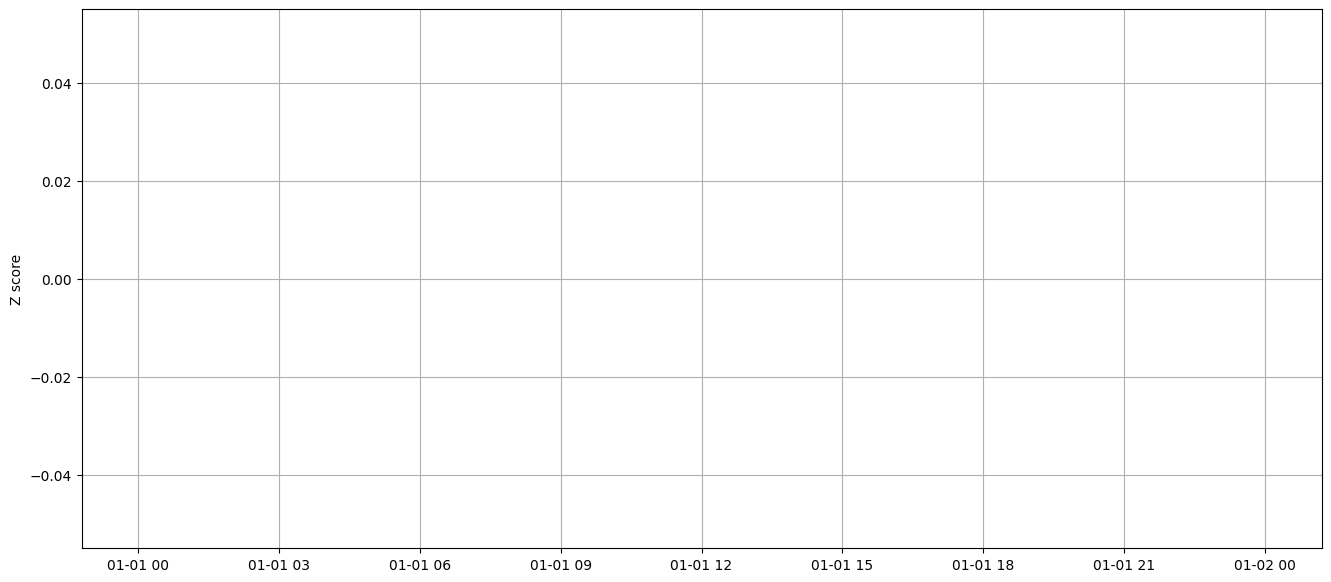

In [293]:
from scipy import stats

# calculate the absolute value of z-score
z_covid = np.abs(stats.zscore(covid))
print('z score of the dataset is:\r\n',z_covid)
plt.figure(figsize=(16,7))
plt.plot(covid_time,z_covid)
plt.grid()
#plt.xlim([datetime.datetime(), end_date])
plt.ylabel('Z score')
plt.show()


In [205]:
covid_daily=covid_time_series[np.logical_not(np.isnan(covid_time_series))]
covid_daily['daily confirmed'] = np.insert(np.diff(covid_daily.values.flatten()), 0, 0)
covid_daily=covid_daily['daily confirmed']
covid_daily=covid_daily.to_numpy()
covid_daily

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
        1.000000e+00,  2.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  1.000000e+00,  1.000000e+00,  1.000000e+00,
        3.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        1.000000e+00,  0.000000e+00,  1.000000e+00,  1.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+01,
        0.000000e+00,  0.000000e+00,  2.000000e+00,  3.000000e+00,
        0.000000e+00,  0.000000e+00,  1.300000e+01,  2.000000e+00,
        1.500000e+01,  0.000000e+00,  5.000000e+00,  5.000000e+00,
        1.800000e+01,  1.600000e+01,  2.100000e+01,  3.600000e+01,
        6.700000e+01,  8.300000e+01,  1.170000e+02,  1.190000e+02,
        2.010000e+02,  2.700000e+02,  2.450000e+02,  4.050000e+02,
        5.560000e+02,  6.740000e+02,  7.020000e+02,  9.070000e+02,
        1.399000e+03,  2.444000e+03,  4.043000e+03,  5.619000e

z score of the dataset is:
 [6.71557196e-01 6.71557196e-01 6.71557196e-01 6.71550328e-01
 6.71550328e-01 6.71543461e-01 6.71557196e-01 6.71557196e-01
 6.71557196e-01 6.71550328e-01 6.71550328e-01 6.71550328e-01
 6.71536593e-01 6.71557196e-01 6.71557196e-01 6.71550328e-01
 6.71557196e-01 6.71557196e-01 6.71557196e-01 6.71557196e-01
 6.71550328e-01 6.71557196e-01 6.71550328e-01 6.71550328e-01
 6.71557196e-01 6.71557196e-01 6.71557196e-01 6.71488519e-01
 6.71557196e-01 6.71557196e-01 6.71543461e-01 6.71536593e-01
 6.71557196e-01 6.71557196e-01 6.71467916e-01 6.71543461e-01
 6.71454180e-01 6.71557196e-01 6.71522857e-01 6.71522857e-01
 6.71433577e-01 6.71447312e-01 6.71412974e-01 6.71309958e-01
 6.71097059e-01 6.70987175e-01 6.70753673e-01 6.70739938e-01
 6.70176785e-01 6.69702912e-01 6.69874605e-01 6.68775771e-01
 6.67738745e-01 6.66928355e-01 6.66736059e-01 6.65328177e-01
 6.61949260e-01 6.54772496e-01 6.43791016e-01 6.32967495e-01
 6.26807152e-01 6.12872555e-01 5.99913173e-01 5.99906305e

ValueError: x and y must have same first dimension, but have shapes (1856,) and (831,)

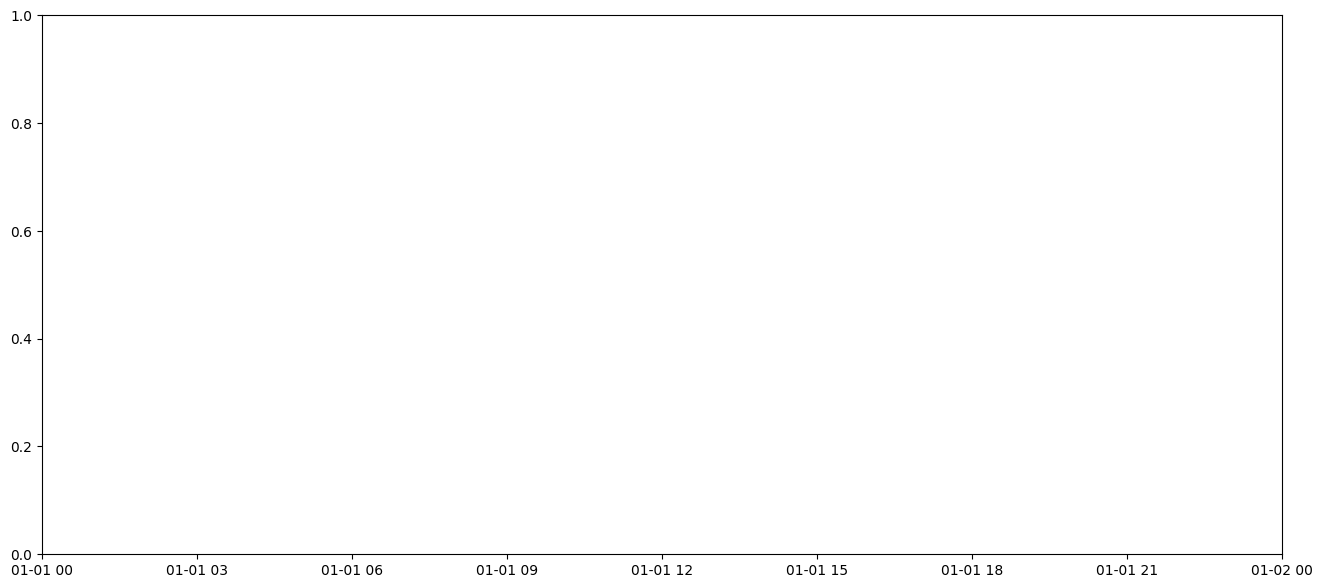

In [294]:
z_covid_daily = np.abs(stats.zscore(covid_daily))
print('z score of the dataset is:\r\n',z_covid_daily)
plt.figure(figsize=(16,7))
plt.plot(covid_time,z_covid_daily)
plt.grid()
plt.ylabel('Z score')
plt.show()

['2017-04-03T00:00:00.000000000' '2017-04-04T00:00:00.000000000'
 '2017-04-05T00:00:00.000000000' ... '2022-04-27T00:00:00.000000000'
 '2022-04-28T00:00:00.000000000' '2022-04-29T00:00:00.000000000']
[ 33.71844731  33.96951717  33.79353362 ... 155.66834473 162.69763002
 156.74212523]
z score of the dataset is:
 [1.04407211 1.03853806 1.04241707 ... 1.64393417 1.79887291 1.66760233]


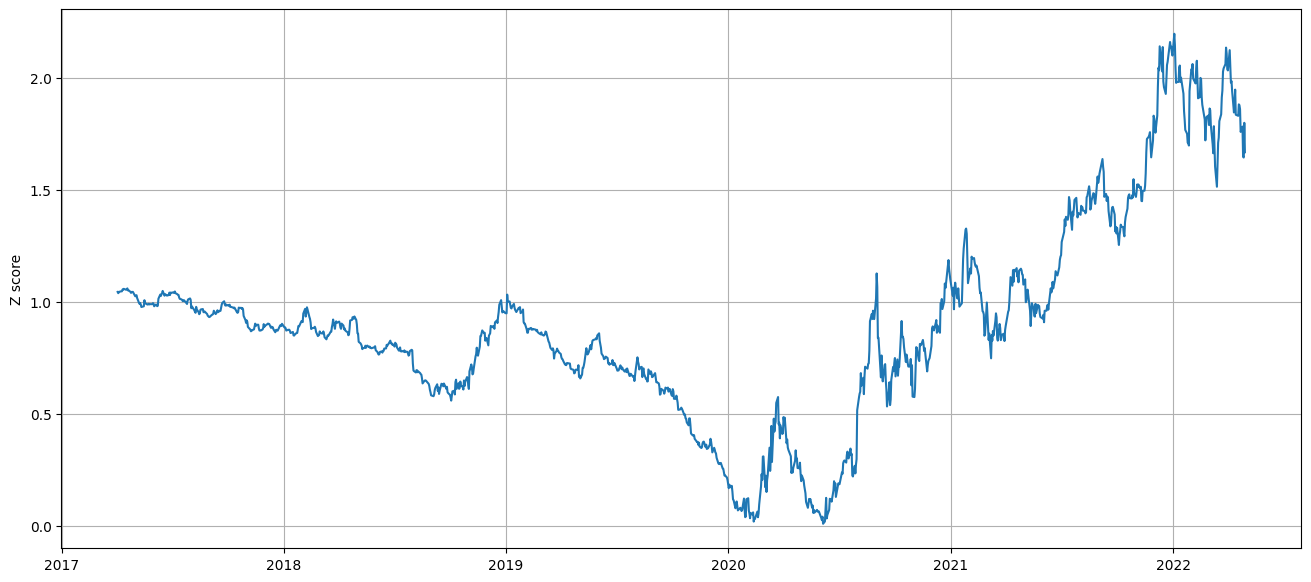

In [207]:
stock=stock_time_series[np.logical_not(np.isnan(stock_time_series))]
stock_time=stock.index.values
print(stock_time)
stock=stock.to_numpy().flatten()
print(stock)

z_stock = np.abs(stats.zscore(stock))
print('z score of the dataset is:\r\n',z_stock)
plt.figure(figsize=(16,7))
plt.plot(stock_time,z_stock)
plt.grid()
#plt.xlim([datetime.datetime(), end_date])
plt.ylabel('Z score')
plt.show()



But, then what? how can we find outlier using these z-scores?

In general, we **put a threshold on z-scores**. Typically, the threshold is 3.
If $|z\_score|>3$, then it is an outlier.

In [239]:
# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z_covid_daily > threshold)

# find the outlier value given its index
outlier_by_Z_Score = z_covid_daily[outlier_loc]
print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
print('the datetime of the outlier is:\r\n', covid_time[outlier_loc])

the data classified as outlier by z score:
 [3.06132166 3.34643493 6.32619995 5.41259444 4.16375506 4.54253712
 5.51055555 9.17659093 4.61609037 5.3787778  5.29447658 5.73826158
 4.21860751 7.42138104 5.17942858 4.46769274 4.9964726  6.41701864
 4.02902419 3.14534818 3.87467912]
the datetime of the outlier is:
 ['2021-12-27T00:00:00.000000000' '2021-12-30T00:00:00.000000000'
 '2022-01-03T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-05T00:00:00.000000000' '2022-01-06T00:00:00.000000000'
 '2022-01-07T00:00:00.000000000' '2022-01-10T00:00:00.000000000'
 '2022-01-11T00:00:00.000000000' '2022-01-12T00:00:00.000000000'
 '2022-01-13T00:00:00.000000000' '2022-01-14T00:00:00.000000000'
 '2022-01-17T00:00:00.000000000' '2022-01-18T00:00:00.000000000'
 '2022-01-19T00:00:00.000000000' '2022-01-20T00:00:00.000000000'
 '2022-01-21T00:00:00.000000000' '2022-01-24T00:00:00.000000000'
 '2022-01-26T00:00:00.000000000' '2022-01-28T00:00:00.000000000'
 '2022-01-31T00:00:00.000000000']


In [221]:
outlier_by_Z_Score

array([3.06132166, 3.34643493, 6.32619995, 5.41259444, 4.16375506,
       4.54253712, 5.51055555, 9.17659093, 4.61609037, 5.3787778 ,
       5.29447658, 5.73826158, 4.21860751, 7.42138104, 5.17942858,
       4.46769274, 4.9964726 , 6.41701864, 4.02902419, 3.14534818,
       3.87467912])

# Box Plot

[ 33.71844731  33.96951717  33.79353362 ... 155.66834473 162.69763002
 156.74212523]
['2017-04-03T00:00:00.000000000' '2017-04-04T00:00:00.000000000'
 '2017-04-05T00:00:00.000000000' ... '2022-04-27T00:00:00.000000000'
 '2022-04-28T00:00:00.000000000' '2022-04-29T00:00:00.000000000']


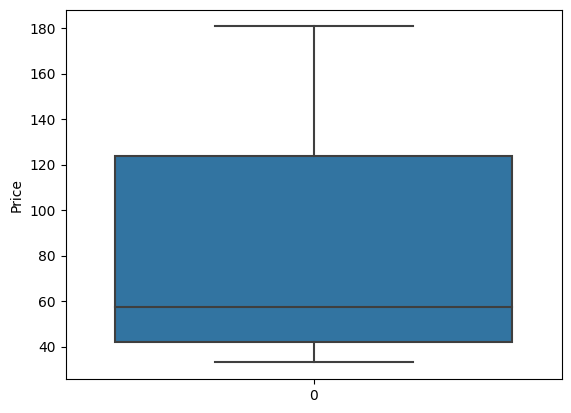

In [223]:
import seaborn as sns

# extract all the data except the last one because it is a NaN, which is missing value. 
# We will see shortly how to deal with missing value.
outlier_dataset_stock = stock
print(outlier_dataset_stock)
#print('\n')
outlier_date_stock = np.array(stock_time)
print(outlier_date_stock)
# box plot
sns.boxplot(outlier_dataset_stock)
plt.ylabel(r'Price')
plt.show()

[ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00
  2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
  1.000000e+00  1.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00
  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00
  2.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  1.300000e+01
  2.000000e+00  1.500000e+01  0.000000e+00  5.000000e+00  5.000000e+00
  1.800000e+01  1.600000e+01  2.100000e+01  3.600000e+01  6.700000e+01
  8.300000e+01  1.170000e+02  1.190000e+02  2.010000e+02  2.700000e+02
  2.450000e+02  4.050000e+02  5.560000e+02  6.740000e+02  7.020000e+02
  9.070000e+02  1.399000e+03  2.444000e+03  4.043000e+03  5.619000e+03
  6.516000e+03  8.545000e+03  1.043200e+04  1.043300e+04  1.463400e+04
  1.699800e+04  1.733000e+04  2.106600e+04  1.852000e+04  2.146900e+04
  2.45

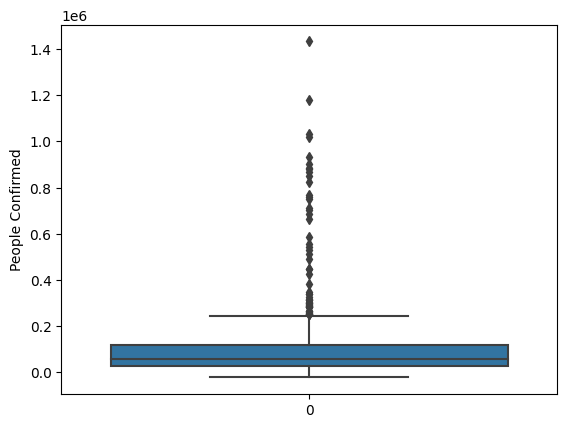

In [224]:
import seaborn as sns
# extract all the data except the last one because it is a NaN, which is missing value. 
# We will see shortly how to deal with missing value.
outlier_dataset_covid = covid_daily
print(outlier_dataset_covid)
#print('\n')
outlier_date_covid = covid_time
print(outlier_date_covid)
# box plot
sns.boxplot(outlier_dataset_covid)
plt.ylabel(r'People Confirmed')
plt.show()

#### Scatter Plot
A scatter plot is the collection of points that shows values for two variables. 

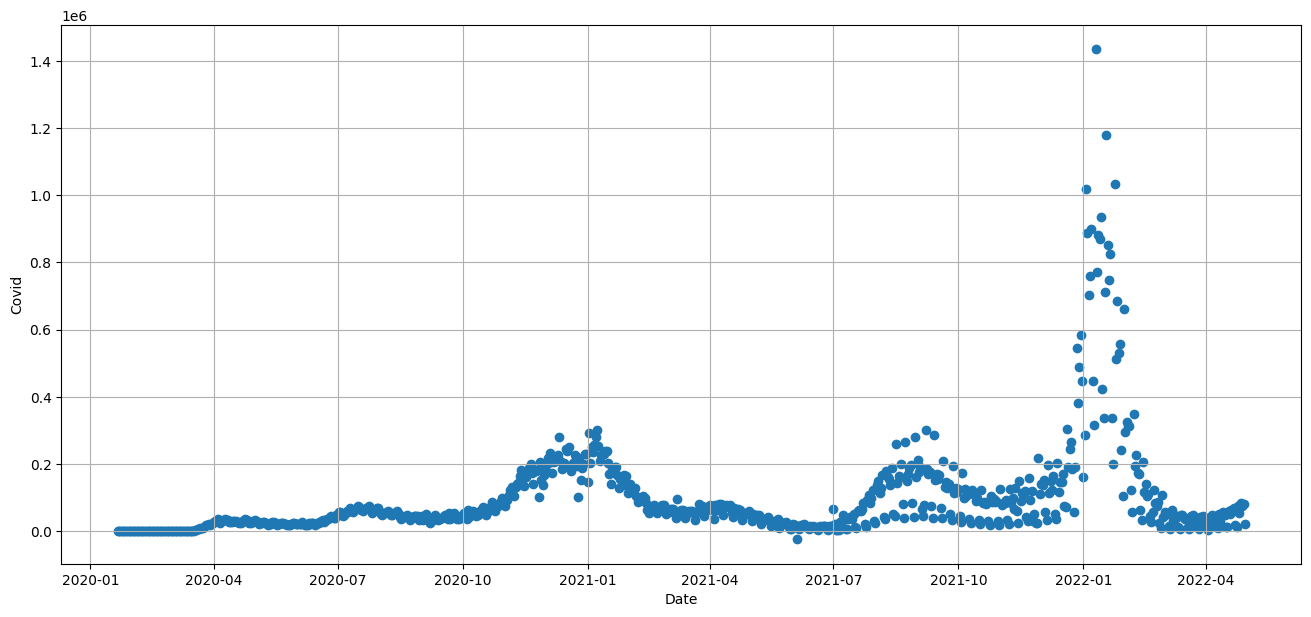

In [225]:
# scatter plot: x=year,y=value
plt.figure(figsize=(16,7))
plt.scatter(outlier_date_covid,outlier_dataset_covid)
plt.xlabel('Date')
plt.ylabel('Covid')
plt.grid()
plt.show()

(831,)
[[ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00
   2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
   1.000000e+00  1.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00
   1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00
   2.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  1.300000e+01
   2.000000e+00  1.500000e+01  0.000000e+00  5.000000e+00  5.000000e+00
   1.800000e+01  1.600000e+01  2.100000e+01  3.600000e+01  6.700000e+01
   8.300000e+01  1.170000e+02  1.190000e+02  2.010000e+02  2.700000e+02
   2.450000e+02  4.050000e+02  5.560000e+02  6.740000e+02  7.020000e+02
   9.070000e+02  1.399000e+03  2.444000e+03  4.043000e+03  5.619000e+03
   6.516000e+03  8.545000e+03  1.043200e+04  1.043300e+04  1.463400e+04
   1.699800e+04  1.733000e+04  2.106600e+04  1.852000e+04

/var/folders/tc/1wtzp2953tn4d7kf_c3cx3000000gn/T/ipykernel_3993/2322996013.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  dropped_outlier_dataset = outlier_dataset_covid[outlier_dataset_covid != outlier_by_Z_Score]
/var/folders/tc/1wtzp2953tn4d7kf_c3cx3000000gn/T/ipykernel_3993/2322996013.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  dropped_outlier_date = outlier_date_covid[outlier_dataset_covid != outlier_by_Z_Score]


<Figure size 2000x900 with 0 Axes>

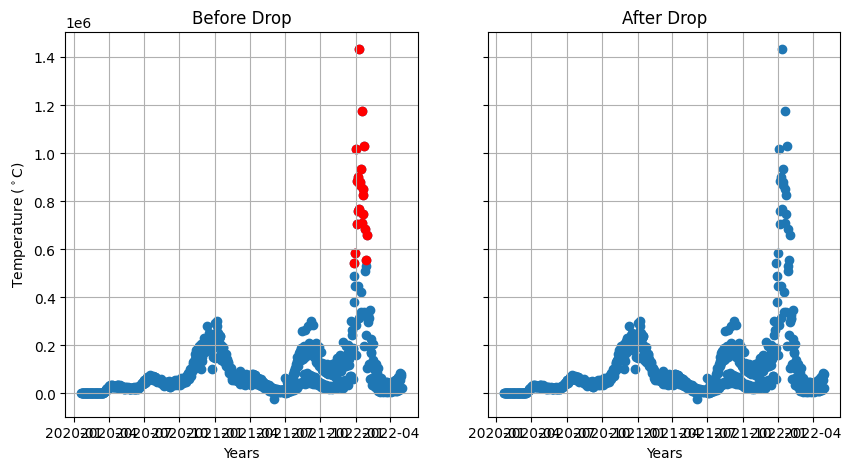

In [254]:

print(outlier_dataset_covid.shape)
dropped_outlier_dataset = outlier_dataset_covid[outlier_dataset_covid != outlier_by_Z_Score]
print(dropped_outlier_dataset)

print(outlier_date_covid.shape)
# do the same for year value
dropped_outlier_date = outlier_date_covid[outlier_dataset_covid != outlier_by_Z_Score]
print(dropped_outlier_date.shape)

print('Before Drop, the dataset has shape:\r\n', outlier_dataset_covid.shape)
print('After Drop, the dataset has shape:\r\n', dropped_outlier_dataset.shape)

plt.figure(figsize=(20,9))
# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Drop')
ax1.scatter(outlier_date_covid,outlier_dataset_covid)
ax1.scatter(outlier_date_covid[outlier_loc], outlier_dataset_covid[outlier_loc], c='r')
ax1.set_xlabel('Years')
ax1.set_ylabel(r'Temperature ($^\circ$C)')
ax1.grid()

ax2.set_title('After Drop')
ax2.scatter(dropped_outlier_date,dropped_outlier_dataset)
ax2.set_xlabel('Years')
ax2.grid()

plt.show()

[[ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00
   2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
   1.000000e+00  1.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00
   1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
   0.000000e+00  0.000000e+00  1.000000e+01  0.000000e+00  0.000000e+00
   2.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  1.300000e+01
   2.000000e+00  1.500000e+01  0.000000e+00  5.000000e+00  5.000000e+00
   1.800000e+01  1.600000e+01  2.100000e+01  3.600000e+01  6.700000e+01
   8.300000e+01  1.170000e+02  1.190000e+02  2.010000e+02  2.700000e+02
   2.450000e+02  4.050000e+02  5.560000e+02  6.740000e+02  7.020000e+02
   9.070000e+02  1.399000e+03  2.444000e+03  4.043000e+03  5.619000e+03
   6.516000e+03  8.545000e+03  1.043200e+04  1.043300e+04  1.463400e+04
   1.699800e+04  1.733000e+04  2.106600e+04  1.852000e+04  2.146

/var/folders/tc/1wtzp2953tn4d7kf_c3cx3000000gn/T/ipykernel_3993/2926862556.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  dropped_outlier_dataset = outlier_dataset_covid[covid_daily!= outlier_by_Z_Score]


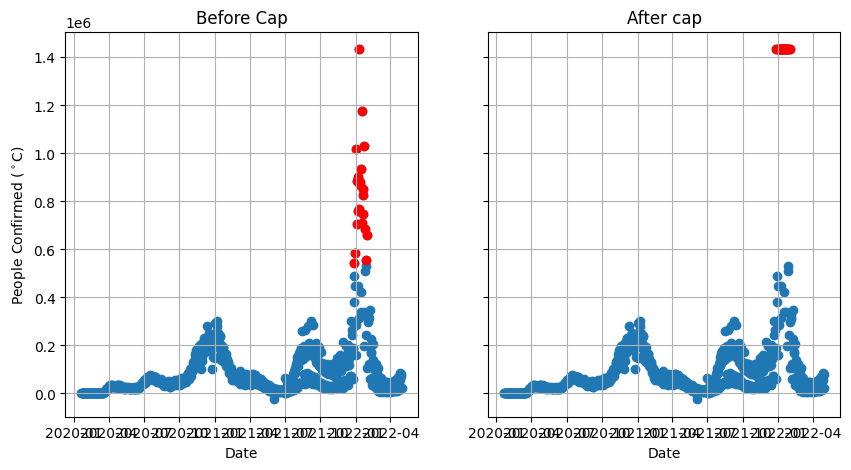

<Figure size 2000x900 with 0 Axes>

In [252]:
dropped_outlier_dataset = outlier_dataset_covid[covid_daily!= outlier_by_Z_Score]
print(dropped_outlier_dataset)
capped_outlier_dataset=np.copy(outlier_dataset_covid)
print('Before cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])
# cap the outliers
capped_outlier_dataset[outlier_loc]=np.max(dropped_outlier_dataset)
print('After cap the outlier, its value:\r\n',capped_outlier_dataset[outlier_loc])

# plot and compare them
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.set_title('Before Cap')
ax1.scatter(outlier_date_covid,outlier_dataset_covid)
ax1.scatter(outlier_date_covid[outlier_loc], outlier_dataset_covid[outlier_loc], c='r')
ax1.set_xlabel('Date')
ax1.set_ylabel(r'People Confirmed ($^\circ$C)')
ax1.grid()

ax2.set_title('After cap')
ax2.scatter(outlier_date_covid,capped_outlier_dataset)
ax2.scatter(outlier_date_covid[outlier_loc], capped_outlier_dataset[outlier_loc], c='r')
ax2.set_xlabel('Date')
ax2.grid()

plt.figure(figsize=(20,9))
plt.show()

'\n# Replace the dataframe column with the new capped outlier.\n# '

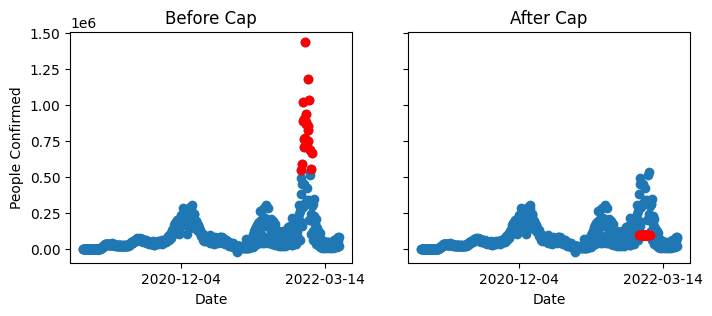

In [263]:

# This basically changes the outlier value to the next minimum value.
capped_outlier_dataset = np.copy(outlier_dataset_covid)
capped_outlier_dataset[outlier_loc] = np.mean(capped_outlier_dataset)


# Plot and compare, before and after the outlier is capped.
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize=(8, 3))
ax1.set_title("Before Cap")
ax1.scatter(outlier_date_covid, outlier_dataset_covid)
ax1.scatter(outlier_date_covid[outlier_loc], outlier_dataset_covid[outlier_loc], c = 'r')
ax1.set_xlabel("Date")
ax1.set_ylabel("People Confirmed")
ax1.xaxis.set_major_locator(MultipleLocator(465)) # Spacing of axis tickers.

ax2.set_title("After Cap")
ax2.scatter(outlier_date_covid, capped_outlier_dataset)
ax2.scatter(outlier_date_covid[outlier_loc], capped_outlier_dataset[outlier_loc], c = 'r')
ax2.set_xlabel("Date")
ax2.xaxis.set_major_locator(MultipleLocator(465)) # Spacing of axis tickers.

# Save figure.
# save_plot(name = "Outlier", plot = " Capping")

"""
# Replace the dataframe column with the new capped outlier.
# """

# np_series = pd.Series(capped_outlier_dataset)
# covid_df = pd.DataFrame(np_series)
# covid_df.index = covid.index

# News["Score"] = new_df[0]



In [ ]:
#read data
df=pd.read_csv(stock_data)
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']
    
#plot price
price=df['Close']
plt.figure(figsize=(16,8))
plt.plot(price, label='Close Price history')
plt.legend()
plt.grid()
plt.savefig('price.jpg')


In [147]:
def visualize(df, fileName, attrs, ylabel):
    """
    Plot and save the figure showing the attribute values movement in a DF, with x being date, y being value.
    :param df:
        dataframe to plot.
    :param fileName:
        File name to save.
    :param attrs:
        list of attributes' names of the input DF.
    :param ylabel:
        ylabel text of the figure.
    """
    date_x = df.index

    plt.figure(figsize=(16,7))

    plt.xlabel('Date')
    plt.ylabel(ylabel)

    for attr in attrs:
        plt.plot_date(date_x, df[attr], '-', linewidth=0.3, label=attr)
    plt.grid(1)
    plt.tight_layout()

    plt.legend()


    download_dir="images/"
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    path = os.path.join(download_dir, fileName)
    if not os.path.exists(path):
        plt.savefig(path)
        print("The figure is saved with ", str(path))
        return
    print("The figure is already saved as ", str(path))
    return

The figure is saved with  images/Visualize_AAPL_Prices.pdf


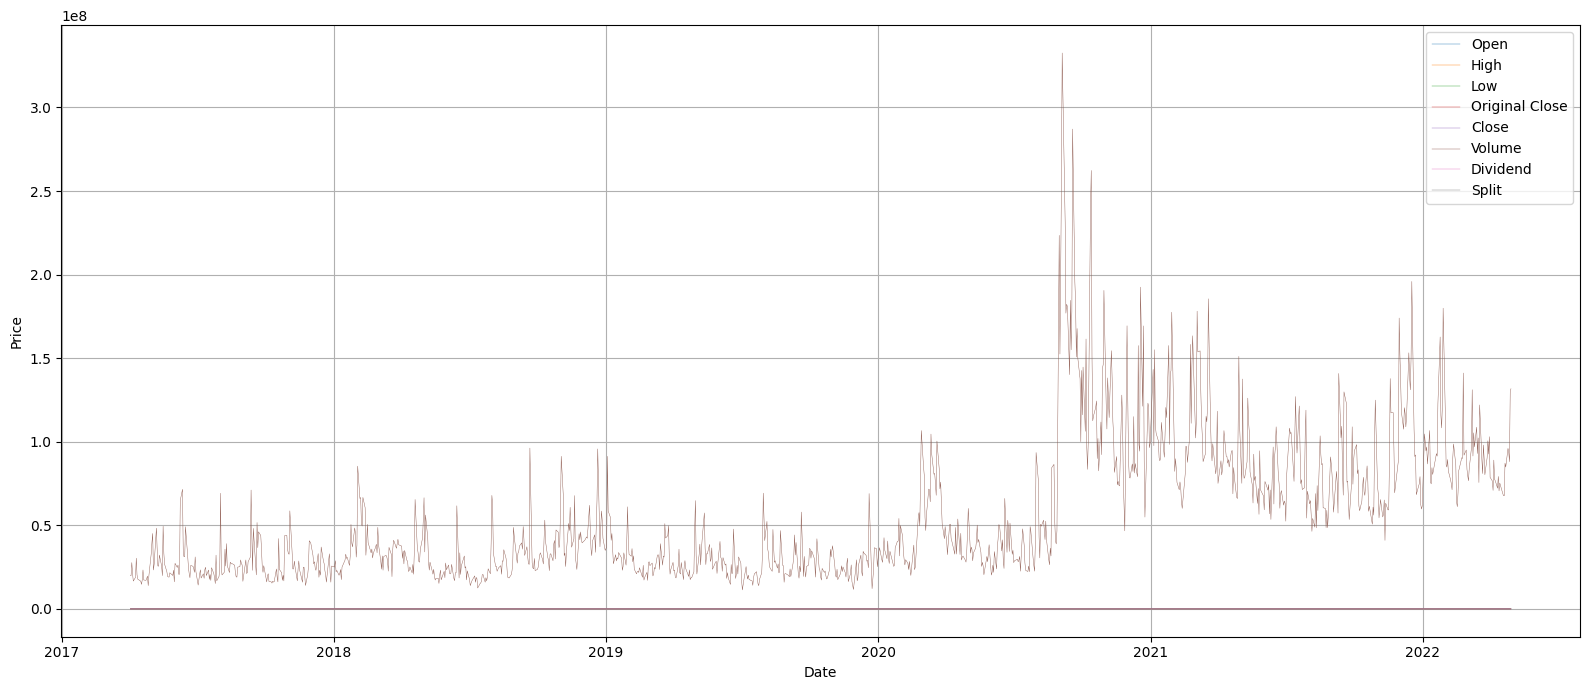

In [149]:
#Open	High	Low	Original Close	Close	Volume	Dividend	Split
visualize(stock_data, 'Visualize_AAPL_Prices.pdf', ['Open', 'High', 'Low', 'Original Close', 'Close', 'Volume', 'Dividend', 'Split'],ylabel="Price")